[View in Colaboratory](https://colab.research.google.com/github/pedrocwb/workshop/blob/master/fashion_mnist.ipynb)

# Exercicio Prático de Deep Learning usando Keras

In [0]:
!pip install -q -U tensorflow>=1.8.0

In [0]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

### Vamos fazer o download da base de dados

In [0]:
# Download do dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

### Entendendo o dado

In [22]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set


y = 5 Sandalia


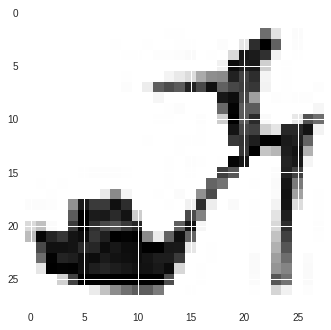

In [23]:
# Define as labels
fashion_mnist_labels = ["Camiseta/top",  # index 0
                        "Calça",         # index 1
                        "Pulôver",       # index 2 
                        "Vestido",       # index 3 
                        "Casaco",        # index 4
                        "Sandalia",      # index 5
                        "Camisa",        # index 6 
                        "Tênis",         # index 7 
                        "bolsa",           # index 8 
                        "Sapato de Salto"] # index 9

# Image index
img_index = 9

# y_train contém as labels
label_index = y_train[img_index]
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
plt.imshow(x_train[img_index])

### Pré-processamento do dado
Vamos normalizar o dado para que tenham aproximadamente a mesma *escala*.
Se verificarmos a primeira imagem do conjunto de treinamento, veremos que os valores caem entre 0 e 255.
Vamos normalizar o dado para que seja em 0 e 1.

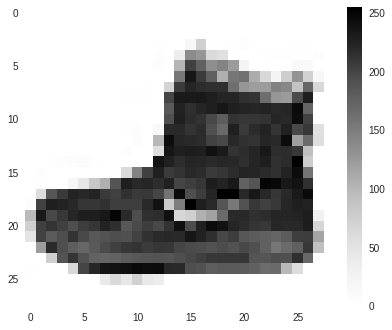

In [26]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

In [27]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


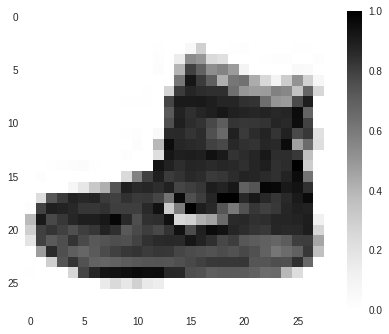

In [28]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

##Dividir o dataset em treinamento, validação e teste

In [30]:
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]


# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


## Criando a arquitetura do modelo

In [31]:
model = tf.keras.Sequential()


# É preciso definir o shape da imagem de entrada na primeira  camada da rede neural
model.add(keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
__________

##Compilando o modelo

Aqui definimos
*   Otimizador
*   Função de perda (ou custo)
*   Um métrica



In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy', 'categorical_accuracy'])

## Treinamento o modelo


In [0]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Using TensorFlow backend.


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 108s 2ms/step - loss: 1.1125 - acc: 0.5740 - val_loss: 0.6873 - val_acc: 0.7280

Epoch 00001: val_loss improved from inf to 0.68730, saving model to model.weights.best.hdf5
Epoch 2/10
55000/55000 [==============================] - 107s 2ms/step - loss: 0.7373 - acc: 0.7149 - val_loss: 0.6594 - val_acc: 0.7590

Epoch 00002: val_loss improved from 0.68730 to 0.65935, saving model to model.weights.best.hdf5
Epoch 3/10
55000/55000 [==============================] - 104s 2ms/step - loss: 0.6995 - acc: 0.7308 - val_loss: 0.5835 - val_acc: 0.7926

Epoch 00003: val_loss improved from 0.65935 to 0.58352, saving model to model.weights.best.hdf5
Epoch 4/10
55000/55000 [==============================] - 105s 2ms/step - loss: 0.6703 - acc: 0.7434 - val_loss: 0.5656 - val_acc: 0.7948

Epoch 00004: val_loss improved from 0.58352 to 0.56560, saving model to model.weights.best.hdf5
Epoch 5/10
5500

In [41]:
# Carregar os pesos do melhor modelo
model.load_weights('model.weights.best.hdf5')

#Avaliando o modelo no conjunto de teste
score = model.evaluate(x_test, y_test, verbose=0)

# Mostra a acurácia 
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6408


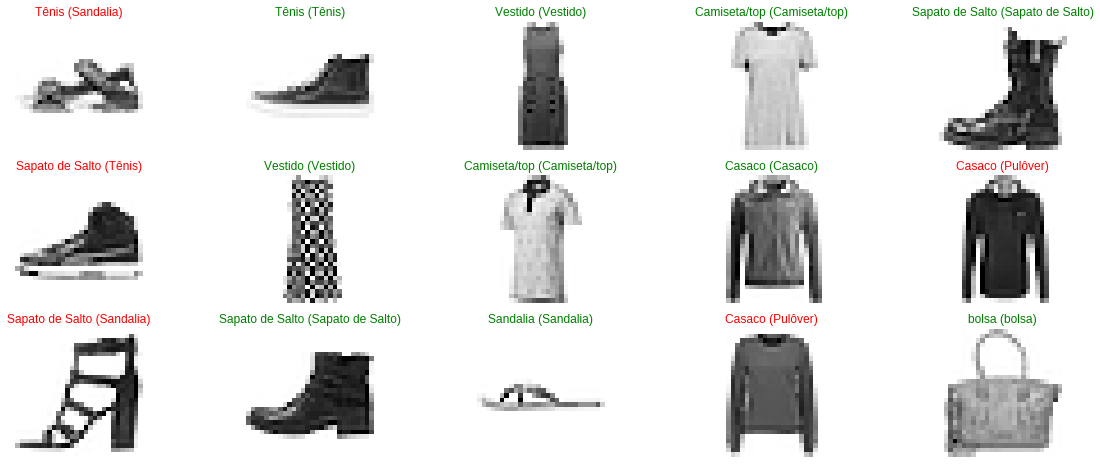

In [42]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))

for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
  
    
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))